In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyPamtraRadarMoments

%matplotlib inline

Settings

In [11]:
kwargs = {
    'maxV': 5.9773,
    'minV': -5.9773,
    'noAve': 9,
    'noiseDistanceFactor': 0,
    'specNoiseMax': None,
    'specNoiseMean': None,
    'nPeaks': 2,
    'peakMinBins': 2,
    'peakMinSnr': 1.2,
    'smoothSpectrum': True,
    'useWiderPeak': False,
    'verbose': 1,
}

Sample Spectra. One contains a bi-modal spectrum, one just noise

In [12]:
spectraCalib = np.load('data/sampleSpectra.npy')

Get the moments. 

In [13]:
(
    spectrum_out,
    moments,
    slope,
    edge,
    quality,
    noise
) =  pyPamtraRadarMoments.calc_radarMoments(spectraCalib,**kwargs)

spectraCalib.shape, spectrum_out.shape

((2, 512), (2, 512))

Results

/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


Text(0,0.5,'dB')

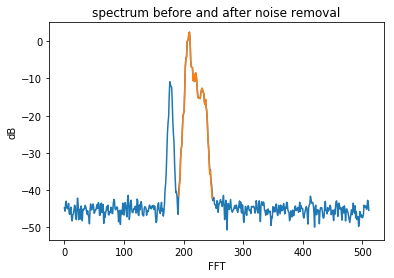

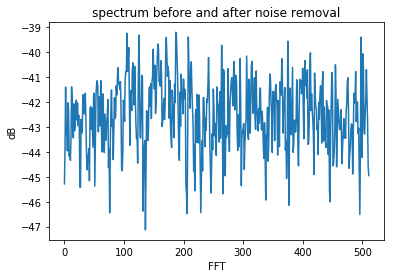

In [14]:
plt.figure(1)
plt.title('spectrum before and after noise removal')
plt.plot(np.log10(spectraCalib[0])*10)
plt.plot(np.log10(spectrum_out[0])*10)
plt.xlabel('FFT')
plt.ylabel('dB')

plt.figure(2)
plt.title('spectrum before and after noise removal')
plt.plot(np.log10(spectraCalib[1])*10)
plt.plot(np.log10(spectrum_out[1])*10)
plt.xlabel('FFT')
plt.ylabel('dB')

Refletivity, Mean Doppler, Spectrum Width, Skewness, Kurtosis of first peak

In [15]:
print(moments[:,:,0])

[[  1.08706297e+01  -1.06172020e+00   1.42231281e-01   2.22837761e+00
    8.82062676e+00]
 [ -9.99900000e+03  -9.99900000e+03  -9.99900000e+03  -9.99900000e+03
   -9.99900000e+03]]


Reflectivity in dBz

In [16]:
print(np.log10(moments[:,0,0])*10)

[ 10.36254701          nan]


/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
